In [1]:
#Importing Libraries
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from yahoofinancials import YahooFinancials

In [2]:
ticker_details = pd.read_excel("Ticker List.xlsx")
ticker = ticker_details['Ticker'].to_list()
names = ticker_details['Description'].to_list()
print(ticker)
print(names)

['GC=F', 'SI=F', 'CL=F', '^GSPC', '^RUT', 'ZN=F', 'ZT=F', 'PL=F', 'HG=F', 'DX=F', '^VIX', 'ZS=F', 'EEM', 'EURUSD=X', '^N100', '^IXIC']
['Gold', 'Silver', 'Crude Oil', 'S&P500', 'Russel 2000 Index', '10 Yr US T-Note futures', '2 Yr US T-Note Futures', 'Platinum', 'Copper', 'Dollar Index', 'Volatility Index', 'Soybean', 'MSCI EM ETF', 'Euro USD', 'Euronext100', 'Nasdaq']


In [3]:
#Preparing Date Range
end_date= datetime.strftime(datetime.today(),'%Y-%m-%d')
start_date = '2019-01-01'
date_range = pd.bdate_range(start=start_date,end=end_date)
values = pd.DataFrame({ 'Date': date_range})
values['Date']= pd.to_datetime(values['Date'])

In [4]:
print("Input Range Date")
values['Date']

Input Range Date


0     2019-01-01
1     2019-01-02
2     2019-01-03
3     2019-01-04
4     2019-01-07
         ...    
570   2021-03-09
571   2021-03-10
572   2021-03-11
573   2021-03-12
574   2021-03-15
Name: Date, Length: 575, dtype: datetime64[ns]

In [5]:
#Extracting Data from Yahoo Finance and Adding them to Values table using date as key
for i in ticker:
    raw_data = YahooFinancials(i)
    raw_data = raw_data.get_historical_price_data(start_date, end_date,'daily')
    df = pd.DataFrame(raw_data[i]['prices'])[['formatted_date','adjclose']]
    df.columns = ['Date1',i]
    df['Date1']= pd.to_datetime(df['Date1'])
    values = values.merge(df,how='left',left_on='Date',right_on='Date1')
    values = values.drop(labels='Date1',axis=1)
    
#Renaming columns to represent instrument names rather than their ticker codes for ease of readability
names.insert(0,'Date')
values.columns = names

In [6]:
values

,Date,Gold,Silver,Crude Oil,S&P500,Russel 2000 Index,10 Yr US T-Note futures,2 Yr US T-Note Futures,Platinum,Copper,Dollar Index,Volatility Index,Soybean,MSCI EM ETF,Euro USD,Euronext100,Nasdaq
0,2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.149306,NaN,NaN
1,2019-01-02,1281.000000,15.542000,46.540001,2510.030029,1355.910034,122.187500,106.125000,799.099976,2.6250,96.422997,23.219999,894.75,37.444263,1.146171,910.349976,6665.939941
2,2019-01-03,1291.800049,15.706000,47.090000,2447.889893,1330.829956,123.156250,106.367188,794.500000,2.5705,95.877998,25.450001,900.25,36.765366,1.131811,897.450012,6463.500000
3,2019-01-04,1282.699951,15.695000,47.959999,2531.939941,1380.750000,122.296875,106.164062,822.000000,2.6515,95.750000,21.379999,909.50,37.951038,1.139108,921.299988,6738.859863
4,2019-01-07,1286.800049,15.669000,48.520000,2549.689941,1405.369995,122.046875,106.078125,818.400024,2.6410,95.227997,21.400000,912.25,38.037098,1.141044,919.659973,6823.470215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,2021-03-09,1716.599976,26.148001,64.010002,3875.439941,2245.060059,133.406250,110.398438,1174.199951,4.0195,91.963997,24.030001,1441.25,53.529999,1.185171,1163.109985,13073.820312
571,2021-03-10,1721.500000,26.101999,64.440002,3898.810059,2285.679932,133.625000,110.414062,1200.599976,4.0420,91.828003,22.559999,1411.50,53.290001,1.189791,1173.010010,13068.830078
572,2021-03-11,1722.300049,26.162001,66.019997,3939.340088,2338.540039,133.718750,110.445312,1201.099976,4.1430,91.417999,21.910000,1415.50,54.970001,1.192606,1183.270020,13398.669922
573,2021-03-12,1719.500000,25.879999,65.610001,3943.340088,2352.790039,132.906250,110.429688,1199.099976,4.1455,91.678001,20.690001,1415.75,53.990002,1.198610,1179.420044,13319.860352


In [7]:
#Front filling the NaN values in the data set(เติมค่าว่างด้วยค่าก่อนหน้าและค่าข้างหลัง)
values = values.fillna(method="ffill",axis=0)
values = values.fillna(method="bfill",axis=0)

In [8]:
values

,Date,Gold,Silver,Crude Oil,S&P500,Russel 2000 Index,10 Yr US T-Note futures,2 Yr US T-Note Futures,Platinum,Copper,Dollar Index,Volatility Index,Soybean,MSCI EM ETF,Euro USD,Euronext100,Nasdaq
0,2019-01-01,1281.000000,15.542000,46.540001,2510.030029,1355.910034,122.187500,106.125000,799.099976,2.6250,96.422997,23.219999,894.75,37.444263,1.149306,910.349976,6665.939941
1,2019-01-02,1281.000000,15.542000,46.540001,2510.030029,1355.910034,122.187500,106.125000,799.099976,2.6250,96.422997,23.219999,894.75,37.444263,1.146171,910.349976,6665.939941
2,2019-01-03,1291.800049,15.706000,47.090000,2447.889893,1330.829956,123.156250,106.367188,794.500000,2.5705,95.877998,25.450001,900.25,36.765366,1.131811,897.450012,6463.500000
3,2019-01-04,1282.699951,15.695000,47.959999,2531.939941,1380.750000,122.296875,106.164062,822.000000,2.6515,95.750000,21.379999,909.50,37.951038,1.139108,921.299988,6738.859863
4,2019-01-07,1286.800049,15.669000,48.520000,2549.689941,1405.369995,122.046875,106.078125,818.400024,2.6410,95.227997,21.400000,912.25,38.037098,1.141044,919.659973,6823.470215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,2021-03-09,1716.599976,26.148001,64.010002,3875.439941,2245.060059,133.406250,110.398438,1174.199951,4.0195,91.963997,24.030001,1441.25,53.529999,1.185171,1163.109985,13073.820312
571,2021-03-10,1721.500000,26.101999,64.440002,3898.810059,2285.679932,133.625000,110.414062,1200.599976,4.0420,91.828003,22.559999,1411.50,53.290001,1.189791,1173.010010,13068.830078
572,2021-03-11,1722.300049,26.162001,66.019997,3939.340088,2338.540039,133.718750,110.445312,1201.099976,4.1430,91.417999,21.910000,1415.50,54.970001,1.192606,1183.270020,13398.669922
573,2021-03-12,1719.500000,25.879999,65.610001,3943.340088,2352.790039,132.906250,110.429688,1199.099976,4.1455,91.678001,20.690001,1415.75,53.990002,1.198610,1179.420044,13319.860352


In [9]:
# Co-ercing numeric type to all columns except Date
cols=values.columns.drop('Date')
values[cols] = values[cols].apply(pd.to_numeric,errors='coerce').round(decimals=1)
imp = ['Gold','Silver', 'Crude Oil', 'S&P500','MSCI EM ETF']

# Calculating Short term -Historical Returns
change_days = [1,3,5,14,21]

data = pd.DataFrame(data=values['Date'])
for i in change_days:
    x= values[cols].pct_change(periods=i).add_suffix("-T-"+str(i))
    data=pd.concat(objs=(data,x),axis=1)
    x=[]


In [10]:
print("change_days",change_days)

change_days [1, 3, 5, 14, 21]


In [11]:
print("values[cols]")
values[cols]

values[cols]


,Gold,Silver,Crude Oil,S&P500,Russel 2000 Index,10 Yr US T-Note futures,2 Yr US T-Note Futures,Platinum,Copper,Dollar Index,Volatility Index,Soybean,MSCI EM ETF,Euro USD,Euronext100,Nasdaq
0,1281.0,15.5,46.5,2510.0,1355.9,122.2,106.1,799.1,2.6,96.4,23.2,894.8,37.4,1.1,910.3,6665.9
1,1281.0,15.5,46.5,2510.0,1355.9,122.2,106.1,799.1,2.6,96.4,23.2,894.8,37.4,1.1,910.3,6665.9
2,1291.8,15.7,47.1,2447.9,1330.8,123.2,106.4,794.5,2.6,95.9,25.5,900.2,36.8,1.1,897.5,6463.5
3,1282.7,15.7,48.0,2531.9,1380.8,122.3,106.2,822.0,2.7,95.8,21.4,909.5,38.0,1.1,921.3,6738.9
4,1286.8,15.7,48.5,2549.7,1405.4,122.0,106.1,818.4,2.6,95.2,21.4,912.2,38.0,1.1,919.7,6823.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,1716.6,26.1,64.0,3875.4,2245.1,133.4,110.4,1174.2,4.0,92.0,24.0,1441.2,53.5,1.2,1163.1,13073.8
571,1721.5,26.1,64.4,3898.8,2285.7,133.6,110.4,1200.6,4.0,91.8,22.6,1411.5,53.3,1.2,1173.0,13068.8
572,1722.3,26.2,66.0,3939.3,2338.5,133.7,110.4,1201.1,4.1,91.4,21.9,1415.5,55.0,1.2,1183.3,13398.7
573,1719.5,25.9,65.6,3943.3,2352.8,132.9,110.4,1199.1,4.1,91.7,20.7,1415.8,54.0,1.2,1179.4,13319.9


In [12]:
print("data")
data

data


,Date,Gold-T-1,Silver-T-1,Crude Oil-T-1,S&P500-T-1,Russel 2000 Index-T-1,10 Yr US T-Note futures-T-1,2 Yr US T-Note Futures-T-1,Platinum-T-1,Copper-T-1,...,2 Yr US T-Note Futures-T-21,Platinum-T-21,Copper-T-21,Dollar Index-T-21,Volatility Index-T-21,Soybean-T-21,MSCI EM ETF-T-21,Euro USD-T-21,Euronext100-T-21,Nasdaq-T-21
0,2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-03,0.008431,0.012903,0.012903,-0.024741,-0.018512,0.008183,0.002828,-0.005756,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-04,-0.007044,0.000000,0.019108,0.034315,0.037571,-0.007305,-0.001880,0.034613,0.038462,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-07,0.003196,0.000000,0.010417,0.007030,0.017816,-0.002453,-0.000942,-0.004380,-0.037037,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,2021-03-09,0.023187,0.035714,-0.016897,0.014131,0.019110,0.003008,0.000000,0.020068,-0.024390,...,-0.000905,0.001535,0.081081,0.012101,0.132075,0.038478,-0.049734,0.0,0.023315,-0.065329
571,2021-03-10,0.002854,0.000000,0.006250,0.006038,0.018084,0.001499,0.000000,0.022483,0.000000,...,-0.000905,0.007722,0.081081,0.015487,0.046296,0.006920,-0.063269,0.0,0.030756,-0.067027
572,2021-03-11,0.000465,0.003831,0.024845,0.010388,0.023100,0.000749,0.000000,0.000416,0.025000,...,-0.000905,-0.034641,0.078947,0.011062,-0.004545,0.045421,-0.036778,0.0,0.043290,-0.041066
573,2021-03-12,-0.001626,-0.011450,-0.006061,0.001015,0.006115,-0.005984,0.000000,-0.001665,0.000000,...,-0.000905,-0.036403,0.078947,0.014381,-0.023585,0.035320,-0.065744,0.0,0.035924,-0.050329


In [13]:
# Calculating Long term Historical Returns
change_days = [60,90,180,250]

for i in change_days:
    x= values[imp].pct_change(periods=i).add_suffix("-T-"+str(i))
    data=pd.concat(objs=(data,x),axis=1)
    x=[]

In [14]:
print("change_days",change_days)

change_days [60, 90, 180, 250]


In [15]:
print("values[imp]")
values[imp]

values[imp]


,Gold,Silver,Crude Oil,S&P500,MSCI EM ETF
0,1281.0,15.5,46.5,2510.0,37.4
1,1281.0,15.5,46.5,2510.0,37.4
2,1291.8,15.7,47.1,2447.9,36.8
3,1282.7,15.7,48.0,2531.9,38.0
4,1286.8,15.7,48.5,2549.7,38.0
...,...,...,...,...,...
570,1716.6,26.1,64.0,3875.4,53.5
571,1721.5,26.1,64.4,3898.8,53.3
572,1722.3,26.2,66.0,3939.3,55.0
573,1719.5,25.9,65.6,3943.3,54.0


In [16]:
print("data")
data

data


,Date,Gold-T-1,Silver-T-1,Crude Oil-T-1,S&P500-T-1,Russel 2000 Index-T-1,10 Yr US T-Note futures-T-1,2 Yr US T-Note Futures-T-1,Platinum-T-1,Copper-T-1,...,Gold-T-180,Silver-T-180,Crude Oil-T-180,S&P500-T-180,MSCI EM ETF-T-180,Gold-T-250,Silver-T-250,Crude Oil-T-250,S&P500-T-250,MSCI EM ETF-T-250
0,2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-03,0.008431,0.012903,0.012903,-0.024741,-0.018512,0.008183,0.002828,-0.005756,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-04,-0.007044,0.000000,0.019108,0.034315,0.037571,-0.007305,-0.001880,0.034613,0.038462,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-07,0.003196,0.000000,0.010417,0.007030,0.017816,-0.002453,-0.000942,-0.004380,-0.037037,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,2021-03-09,0.023187,0.035714,-0.016897,0.014131,0.019110,0.003008,0.000000,0.020068,-0.024390,...,-0.042610,0.410811,0.628499,0.250008,0.351010,0.033972,0.838028,1.666667,0.583541,0.651235
571,2021-03-10,0.002854,0.000000,0.006250,0.006038,0.018084,0.001499,0.000000,0.022483,0.000000,...,-0.029156,0.441989,0.618090,0.251260,0.332500,0.054647,0.763514,1.628571,0.574891,0.591045
572,2021-03-11,0.000465,0.003831,0.024845,0.010388,0.023100,0.000749,0.000000,0.000416,0.025000,...,-0.034585,0.439560,0.621622,0.258562,0.344743,0.043755,0.794521,1.920354,0.497776,0.580460
573,2021-03-12,-0.001626,-0.011450,-0.006061,0.001015,0.006115,-0.005984,0.000000,-0.001665,0.000000,...,-0.036155,0.423077,0.611794,0.259840,0.320293,0.058871,0.786207,2.051163,0.551564,0.646341


In [17]:
print("cols")
cols

cols


Index(['Gold', 'Silver', 'Crude Oil', 'S&P500', 'Russel 2000 Index',
       '10 Yr US T-Note futures', '2 Yr US T-Note Futures', 'Platinum',
       'Copper', 'Dollar Index', 'Volatility Index', 'Soybean', 'MSCI EM ETF',
       'Euro USD', 'Euronext100', 'Nasdaq'],
      dtype='object')

In [18]:
print("values[cols]")
values[cols]

values[cols]


,Gold,Silver,Crude Oil,S&P500,Russel 2000 Index,10 Yr US T-Note futures,2 Yr US T-Note Futures,Platinum,Copper,Dollar Index,Volatility Index,Soybean,MSCI EM ETF,Euro USD,Euronext100,Nasdaq
0,1281.0,15.5,46.5,2510.0,1355.9,122.2,106.1,799.1,2.6,96.4,23.2,894.8,37.4,1.1,910.3,6665.9
1,1281.0,15.5,46.5,2510.0,1355.9,122.2,106.1,799.1,2.6,96.4,23.2,894.8,37.4,1.1,910.3,6665.9
2,1291.8,15.7,47.1,2447.9,1330.8,123.2,106.4,794.5,2.6,95.9,25.5,900.2,36.8,1.1,897.5,6463.5
3,1282.7,15.7,48.0,2531.9,1380.8,122.3,106.2,822.0,2.7,95.8,21.4,909.5,38.0,1.1,921.3,6738.9
4,1286.8,15.7,48.5,2549.7,1405.4,122.0,106.1,818.4,2.6,95.2,21.4,912.2,38.0,1.1,919.7,6823.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,1716.6,26.1,64.0,3875.4,2245.1,133.4,110.4,1174.2,4.0,92.0,24.0,1441.2,53.5,1.2,1163.1,13073.8
571,1721.5,26.1,64.4,3898.8,2285.7,133.6,110.4,1200.6,4.0,91.8,22.6,1411.5,53.3,1.2,1173.0,13068.8
572,1722.3,26.2,66.0,3939.3,2338.5,133.7,110.4,1201.1,4.1,91.4,21.9,1415.5,55.0,1.2,1183.3,13398.7
573,1719.5,25.9,65.6,3943.3,2352.8,132.9,110.4,1199.1,4.1,91.7,20.7,1415.8,54.0,1.2,1179.4,13319.9


In [19]:
#Calculating Moving averages for Gold
moving_avg = pd.DataFrame(values['Date'],columns=['Date'])
moving_avg['Date']=pd.to_datetime(moving_avg['Date'],format='%Y-%b-%d')
moving_avg['Gold/15SMA'] = (values['Gold']/(values['Gold'].rolling(window=15).mean()))-1
moving_avg['Gold/30SMA'] = (values['Gold']/(values['Gold'].rolling(window=30).mean()))-1
moving_avg['Gold/60SMA'] = (values['Gold']/(values['Gold'].rolling(window=60).mean()))-1
moving_avg['Gold/90SMA'] = (values['Gold']/(values['Gold'].rolling(window=90).mean()))-1
moving_avg['Gold/180SMA'] = (values['Gold']/(values['Gold'].rolling(window=180).mean()))-1
moving_avg['Gold/90EMA'] = (values['Gold']/(values['Gold'].ewm(span=90,adjust=True,ignore_na=True).mean()))-1
moving_avg['Gold/180EMA'] = (values['Gold']/(values['Gold'].ewm(span=180,adjust=True,ignore_na=True).mean()))-1
moving_avg = moving_avg.dropna(axis=0)

In [20]:
print("moving_avg")
moving_avg

moving_avg


,Date,Gold/15SMA,Gold/30SMA,Gold/60SMA,Gold/90SMA,Gold/180SMA,Gold/90EMA,Gold/180EMA
179,2019-09-09,-0.012702,0.000584,0.033540,0.070735,0.113020,0.050884,0.079840
180,2019-09-10,-0.019909,-0.008676,0.023665,0.060516,0.103253,0.041567,0.070313
181,2019-09-11,-0.016773,-0.007452,0.024724,0.061629,0.105318,0.043395,0.072257
182,2019-09-12,-0.014005,-0.006308,0.026432,0.062878,0.107557,0.045313,0.074313
183,2019-09-13,-0.017598,-0.012468,0.019987,0.055640,0.100851,0.038947,0.067790
...,...,...,...,...,...,...,...,...
570,2021-03-09,-0.016977,-0.039578,-0.061889,-0.065808,-0.082991,-0.058805,-0.056319
571,2021-03-10,-0.012301,-0.034615,-0.058057,-0.062160,-0.080233,-0.054953,-0.053063
572,2021-03-11,-0.009907,-0.032075,-0.056200,-0.060456,-0.079637,-0.053380,-0.052071
573,2021-03-12,-0.009379,-0.031329,-0.056302,-0.060669,-0.080957,-0.053776,-0.053050


In [21]:
#Merging Moving Average values to the feature space
data['Date']=pd.to_datetime(data['Date'],format='%Y-%b-%d')
data = pd.merge(left=data,right=moving_avg,how='left',on='Date')
data = data[data['Gold-T-250'].notna()]
prediction_data = data.copy()

In [22]:
print("prediction_data")
prediction_data

prediction_data


,Date,Gold-T-1,Silver-T-1,Crude Oil-T-1,S&P500-T-1,Russel 2000 Index-T-1,10 Yr US T-Note futures-T-1,2 Yr US T-Note Futures-T-1,Platinum-T-1,Copper-T-1,...,Crude Oil-T-250,S&P500-T-250,MSCI EM ETF-T-250,Gold/15SMA,Gold/30SMA,Gold/60SMA,Gold/90SMA,Gold/180SMA,Gold/90EMA,Gold/180EMA
250,2019-12-17,-0.000271,0.000000,0.011628,0.000345,0.004667,0.000778,0.000000,-0.001614,0.00000,...,0.309677,0.271912,0.165775,0.005688,0.005910,-0.003631,-0.011229,0.037102,0.004530,0.021762
251,2019-12-18,-0.001356,0.000000,0.000000,-0.000439,0.002473,-0.002333,0.000930,0.006359,0.00000,...,0.309677,0.271355,0.171123,0.003448,0.004948,-0.004623,-0.012252,0.035034,0.003097,0.020131
252,2019-12-19,0.003803,0.005882,0.004926,0.004481,0.003250,0.002338,0.000000,-0.000214,0.00000,...,0.299363,0.309449,0.190217,0.006130,0.008448,-0.000508,-0.008189,0.038201,0.006758,0.023722
253,2019-12-20,-0.002368,0.000000,-0.013072,0.004929,0.002879,-0.003110,-0.000929,-0.022924,0.00000,...,0.258333,0.272246,0.155263,0.002779,0.005754,-0.002601,-0.010259,0.034999,0.004278,0.021042
254,2019-12-23,0.005289,0.017544,0.001656,0.000869,0.001316,-0.000780,0.000000,0.026971,0.00000,...,0.247423,0.264462,0.157895,0.007161,0.010453,0.002485,-0.004891,0.039680,0.009376,0.026124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,2021-03-09,0.023187,0.035714,-0.016897,0.014131,0.019110,0.003008,0.000000,0.020068,-0.02439,...,1.666667,0.583541,0.651235,-0.016977,-0.039578,-0.061889,-0.065808,-0.082991,-0.058805,-0.056319
571,2021-03-10,0.002854,0.000000,0.006250,0.006038,0.018084,0.001499,0.000000,0.022483,0.00000,...,1.628571,0.574891,0.591045,-0.012301,-0.034615,-0.058057,-0.062160,-0.080233,-0.054953,-0.053063
572,2021-03-11,0.000465,0.003831,0.024845,0.010388,0.023100,0.000749,0.000000,0.000416,0.02500,...,1.920354,0.497776,0.580460,-0.009907,-0.032075,-0.056200,-0.060456,-0.079637,-0.053380,-0.052071
573,2021-03-12,-0.001626,-0.011450,-0.006061,0.001015,0.006115,-0.005984,0.000000,-0.001665,0.00000,...,2.051163,0.551564,0.646341,-0.009379,-0.031329,-0.056302,-0.060669,-0.080957,-0.053776,-0.053050


Model 1Day

In [23]:
from pycaret.regression import *
#Loading the stored model
regressor_1 = load_model("1Day Regressor");

#Making Predictions(ค่าเปอร์เซ็นต์แนวโน้ม)
predicted_return_1 = predict_model(regressor_1,data=prediction_data)
predicted_return_1=predicted_return_1[['Date','Label']]
predicted_return_1.columns = ['Date','Return_1']
predicted_return_1


,Date,Return_1
0,2019-12-17,-0.0004
1,2019-12-18,-0.0024
2,2019-12-19,-0.0002
3,2019-12-20,-0.0034
4,2019-12-23,-0.0008
5,2019-12-24,-0.0025
6,2019-12-25,-0.0083
7,2019-12-26,-0.0023
8,2019-12-27,-0.0009
9,2019-12-30,-0.0020


In [129]:
#Adding return Predictions to Gold Values
predicted_values = values[['Date','Gold']]
predicted_values = predicted_values.tail(len(predicted_return_1))
predicted_values = pd.merge(left=predicted_values,right=predicted_return_1,on=['Date'],how='inner')
predicted_values['Gold-T+1']=(predicted_values['Gold']*(1+predicted_values['Return_1'])).round(decimals =1)
predicted_values


,Date,Gold,Return_1,Gold-T+1
0,2019-12-17,1474.6,-0.0004,1474.0
1,2019-12-18,1472.6,-0.0024,1469.1
2,2019-12-19,1478.2,-0.0002,1477.9
3,2019-12-20,1474.7,-0.0034,1469.7
4,2019-12-23,1482.5,-0.0008,1481.3
5,2019-12-24,1482.5,-0.0025,1478.8
6,2019-12-25,1482.5,-0.0083,1470.2
7,2019-12-26,1509.3,-0.0023,1505.8
8,2019-12-27,1513.8,-0.0009,1512.4
9,2019-12-30,1514.5,-0.0020,1511.5


In [130]:
#Adding T+1 Date
from datetime import datetime, timedelta
predicted_values['Date-T+1'] = predicted_values['Date']+timedelta(days = 1)


#predicted_values.tail()
#predicted_values.head()
#predicted_values

In [131]:
#predicted_values['Dist'] = predicted_values['Gold-T+1']-predicted_values['Gold'][1:]
predicted_values

,Date,Gold,Return_1,Gold-T+1,Date-T+1
0,2019-12-17,1474.6,-0.0004,1474.0,2019-12-18
1,2019-12-18,1472.6,-0.0024,1469.1,2019-12-19
2,2019-12-19,1478.2,-0.0002,1477.9,2019-12-20
3,2019-12-20,1474.7,-0.0034,1469.7,2019-12-21
4,2019-12-23,1482.5,-0.0008,1481.3,2019-12-24
5,2019-12-24,1482.5,-0.0025,1478.8,2019-12-25
6,2019-12-25,1482.5,-0.0083,1470.2,2019-12-26
7,2019-12-26,1509.3,-0.0023,1505.8,2019-12-27
8,2019-12-27,1513.8,-0.0009,1512.4,2019-12-28
9,2019-12-30,1514.5,-0.0020,1511.5,2019-12-31


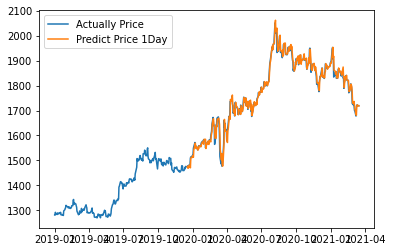

In [27]:
plt.plot(values['Date'],values['Gold'],label='Actually Price')
plt.plot(predicted_values['Date-T+1'],predicted_values['Gold-T+1'],label='Predict Price 1Day')
plt.legend()